In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
df2=pd.read_csv('C:/Users/belky/column_2C_weka.csv')
df3=pd.read_csv('C:/Users/belky/column_3C_weka.csv')

In [141]:
df2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [142]:
df3.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


Los dataset son los mismos, solo que en df2, hay dos anomalías. Estas se unifican en df3.

In [143]:
df3.info()
df=df3.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


# I

El nombre de las columnas que tenemos es:

0. Incidencia Pélvica (IP)
1. Inclinación Pélvica (AP)
2. Ángulo Lordosis Lumbar (ALL)
3. Pendiente Sacra (PS)
4. Radio Pélvico (RP)
5. Grado de Espondilolistesis (GE)
6. Clase

Ahora, las vamos a cambiar por sus siglas:

In [144]:
df.rename(columns={'pelvic_incidence':'IP','pelvic_tilt':'AP','lumbar_lordosis_angle':'ALL','sacral_slope':'PS','pelvic_radius':'RP',
                      'degree_spondylolisthesis':'GE'},inplace=True)

Quedando así...

In [145]:
df.head()

,IP,AP,ALL,PS,RP,GE,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


# II

Vamos a ver cómo se distribuyen los datos frente a la '_clases_':

<AxesSubplot:ylabel='class'>

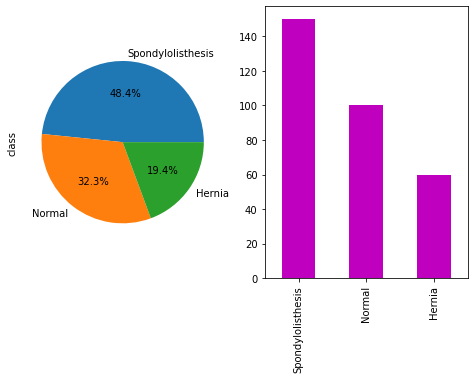

In [146]:
graf, mallas=plt.subplots(nrows=1,ncols=2, figsize=(8,5))

df['class'].value_counts().plot(kind="bar",color='m',ax=mallas[1])
df['class'].value_counts().plot.pie(autopct="%1.1f%%",ax=mallas[0])

Como se ve, casi la mitad de los datos son de personas que tienen Espondilolistesis (más de 140). Y el 19% de los datos son de personas que tienen Hernias (60 personas).

# III
Vamos a ver cómo es la distribución de las demás variables: se hace histogramas a las variables, y se les aplica un KDE.

In [147]:
import seaborn as sns

C:\Users\belky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\belky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\belky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

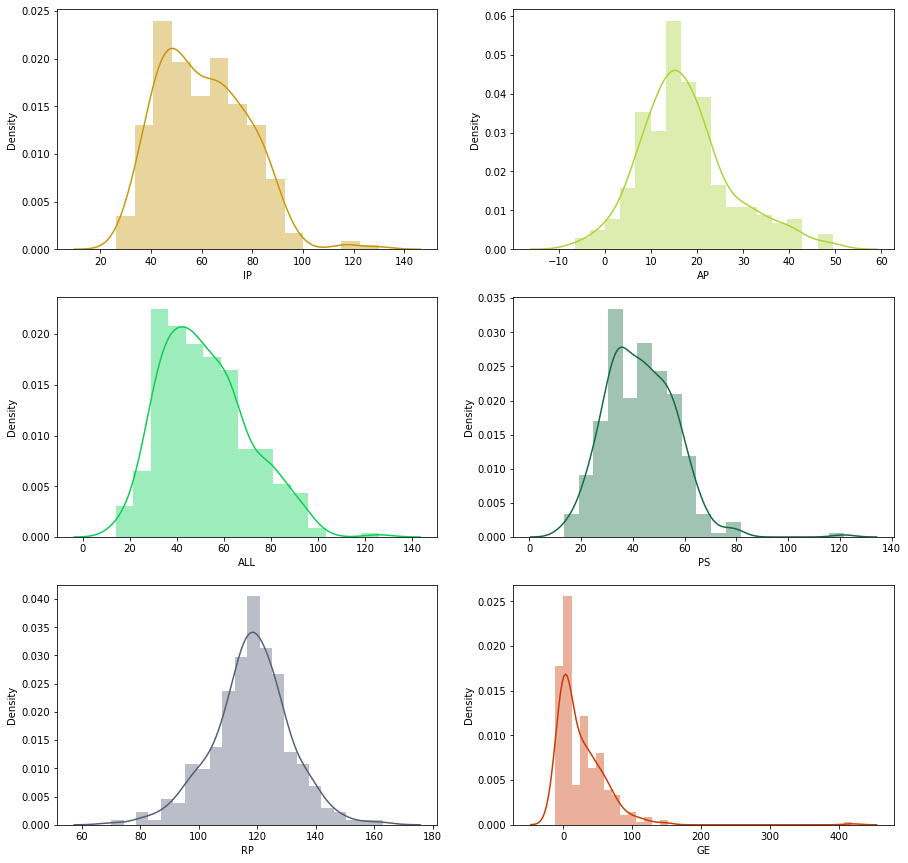

In [148]:
graf, malla=plt.subplots(nrows=3,ncols=2,figsize=(15,15)) 
malla=malla.flatten()
columnas=df.drop('class',axis=1).columns.values

for i, columnas in enumerate(columnas):
    color=['#C7980A', '#F4651F', '#82D8A7', '#CC3A05', '#575E76', '#156943', '#0BD055', '#ACD338']
    #print(columnas,i)
    sns.distplot(df[columnas],color=color[-i],ax=malla[i])


¿Qué se puede apreciar a partir de las gráficas de KDE?

1. Que 120 es el valor predominante en el readio pélvico, y que los demás valores casi que se distribuyen como una gaussiana al rededor de ese punto.
2. Que el grado de Espondiolitesis toma un valor predominante mayor a cero.

# IV
Vamos a ver cómo se distribuyen las categorías, según la variables '_class_':

C:\Users\belky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\belky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\belky\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


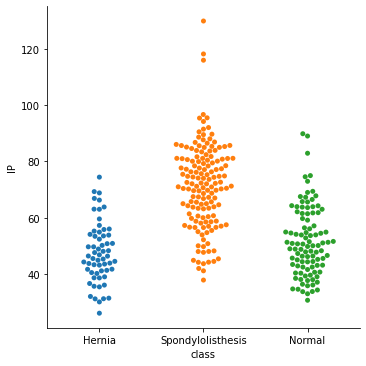

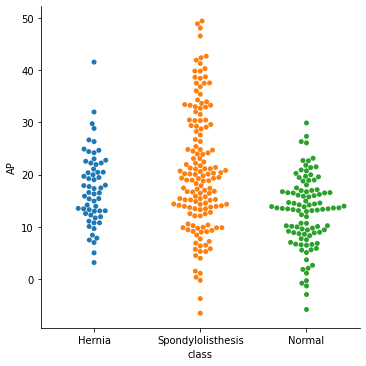

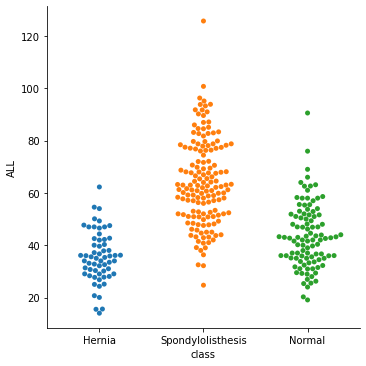

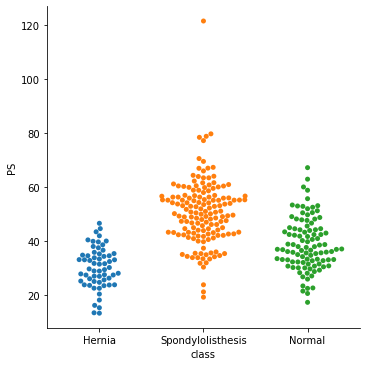

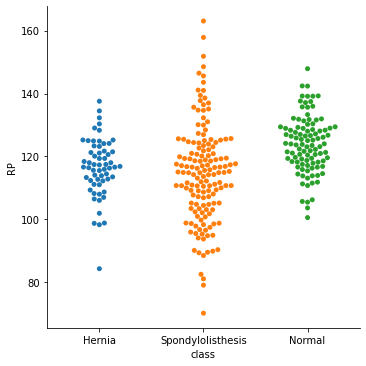

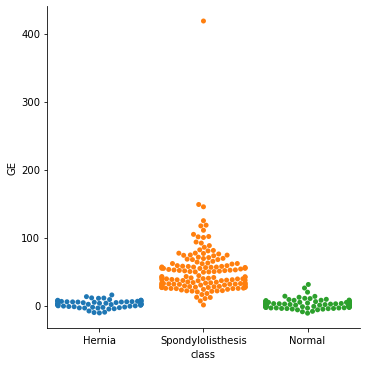

In [149]:
columnas=df.drop('class',axis=1).columns.values
#gra, malla=plt.subplots(nrows=3,ncols=2, figsize=(15,10))
for i in range(len(columnas)):
        sns.catplot(x = "class", y = columnas[i], data = df, kind = "swarm")

# V
Vamos a ver las estadísticas de los datos.

In [150]:
df.describe()

,IP,AP,ALL,PS,RP,GE
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Para tener mejor idea, vamos a hacer gráficos de diagramas de caja. Y ver como es el comportamiento de cada clase, con determinada característica.


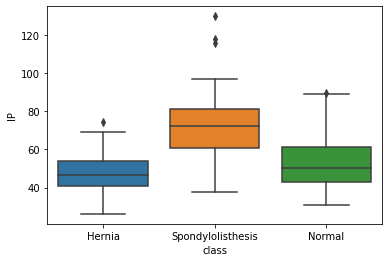

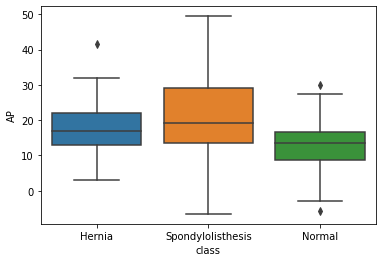

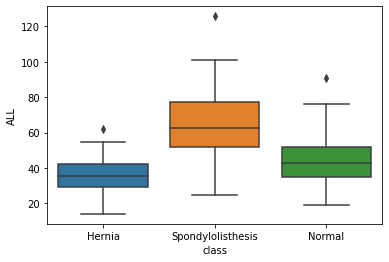

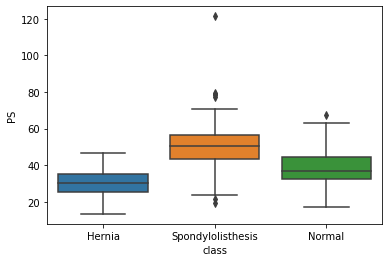

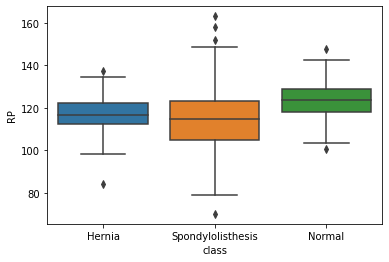

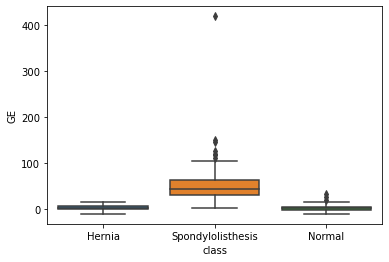

In [151]:
#fig, malla=plt.subplots(nrows=2,ncols=3, figsize=(15,10))
columnas
for i in range (len(columnas)):
    sns.boxplot(x='class', y=columnas[i], data=df)
    plt.show()

Como vemos, los datos se comportan relativamente bien. Ellos no tienen tanto sesgo. Pero la clase **Espondilolistesis** es quien tiene más outliers. 

**¿Cómo trataremos ese outlier?**

Reemplacemoslo por la media y por la mediana, a ver cómo se comportan los datos, mejor:


<AxesSubplot:xlabel='class', ylabel='GE'>

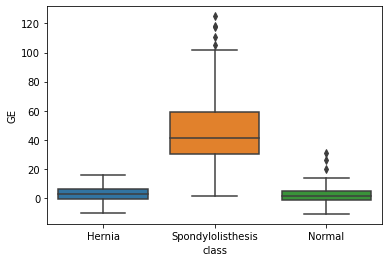

In [153]:
for i in range (310):
    if df['GE'][i]>140:
        #print(df['GE'][i])
        df['GE'][i]=df['GE'].mean()
        #print(df['GE'][i])
sns.boxplot(x='class', y=df['GE'], data=df)

<ipython-input-154-80ded14c5310>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PS'][i]=df['PS'].mean()


<AxesSubplot:xlabel='class', ylabel='PS'>

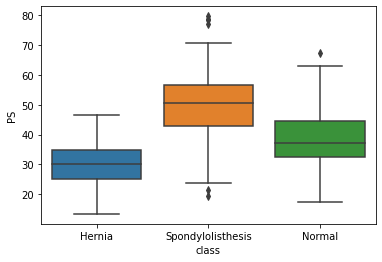

In [154]:
for i in range (310):
    if df['PS'][i]>100:
        df['PS'][i]=df['PS'].mean()
        
sns.boxplot(x='class', y=df['PS'], data=df)

<ipython-input-155-58193bb51792>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IP'][i]=df['IP'].mean()


<AxesSubplot:xlabel='class', ylabel='IP'>

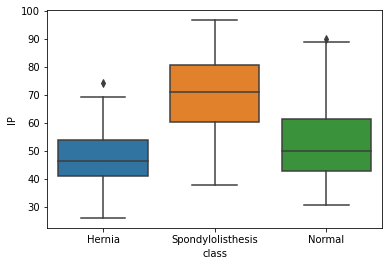

In [155]:
for i in range (310):
    if df['IP'][i]>100:
        df['IP'][i]=df['IP'].mean()
        
sns.boxplot(x='class', y=df['IP'], data=df)

Esta siguiente linea me afecta los datos:

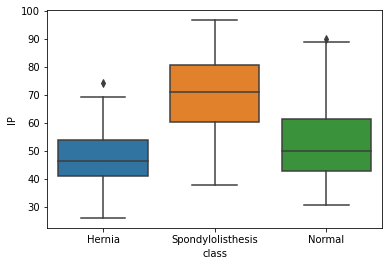

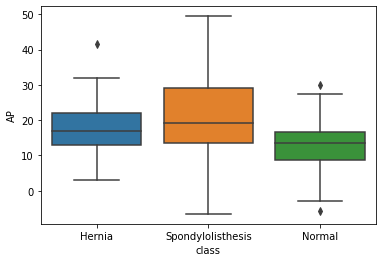

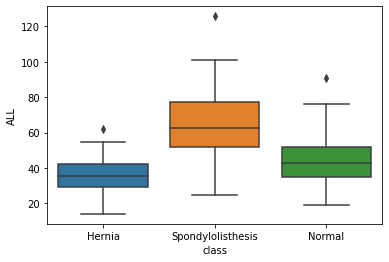

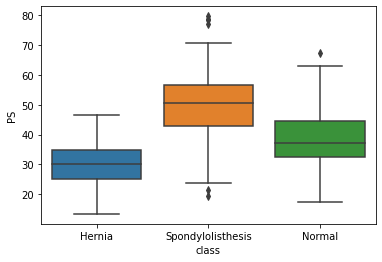

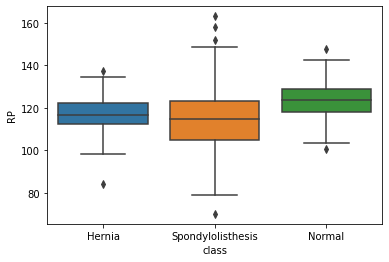

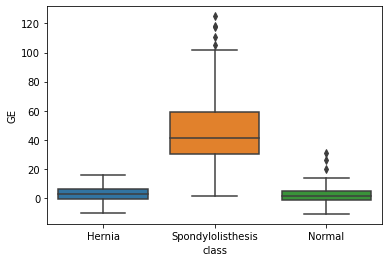

In [156]:
#fig, malla=plt.subplots(nrows=2,ncols=3, figsize=(15,10))
columnas
for i in range (len(columnas)):
    sns.boxplot(x='class', y=columnas[i], data=df)
    plt.show()

# VI
Se muestra la correnlación entre las variables.

<ipython-input-236-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

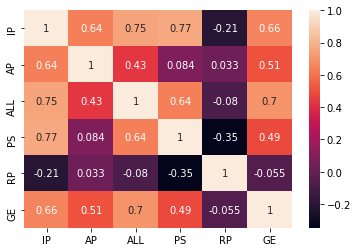

In [236]:
sns.heatmap(df.corr(),annot=True)